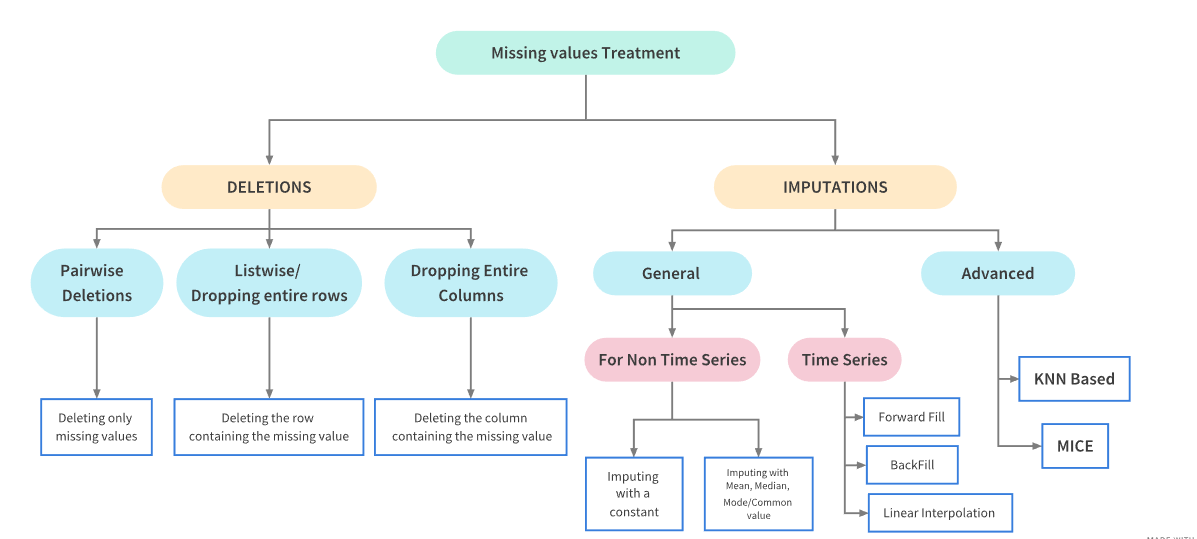

Real world data is messy and often contains a lot of missing values. There could be multiple reasons for the missing values but primarily the reason for missingness can be attributed to

Reason for missing Data
Data doesn't exist
Data not collected due to human error.
Data deleted accidently
Either way we need to address this issue before we proceed with the modeling stuff. It is also important to note that some algorithms like XGBoost and LightGBM can treat missing data without any preprocessing.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [13]:
!pip install missingno

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
import missingno as msno

In [1]:
import os

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [18]:
print('train shape:',train.shape)
print('test shape:',test.shape)

train shape: (891, 12)
test shape: (418, 11)


In [19]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
train['Survived'].value_counts()

,count
Survived,
0,549
1,342


la cai gi day: <Axes.ArtistList of 2 patches>


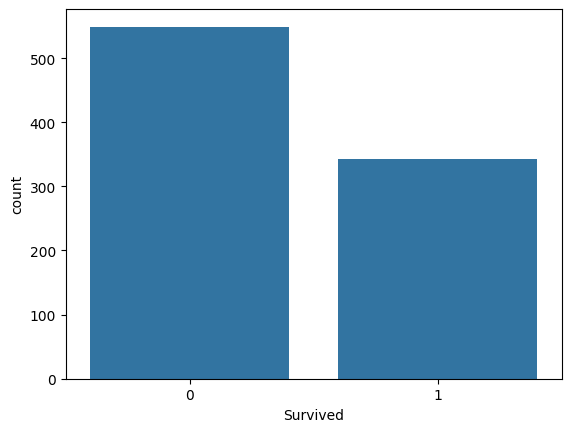

In [24]:
s = sns.countplot(x = 'Survived',data = train)
print('la cai gi day:',s.patches)
size = []

In [34]:
for p in s.patches:
  print(p)
  print(p.get_height())
  print(p.get_x())
  print(p.get_width(),'\n')


Rectangle(xy=(-0.4, 0), width=0.8, height=549, angle=0)
549.0
-0.4
0.8 

Rectangle(xy=(0.6, 0), width=0.8, height=342, angle=0)
342.0
0.6
0.7999999999999999 



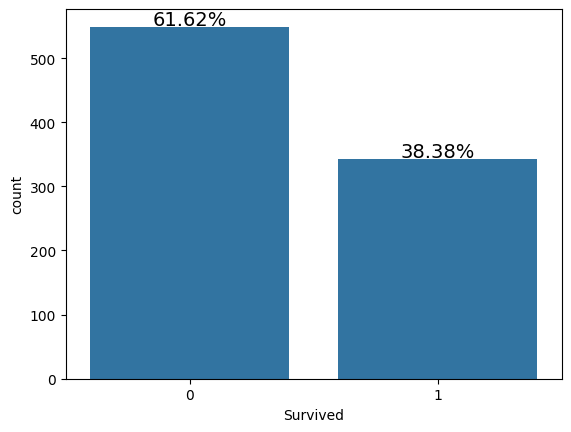

In [42]:
s = sns.countplot(x = 'Survived',data = train)
for p in s.patches:
  height = p.get_height()
  size.append(height)
  s.text(p.get_x()+p.get_width()/2.,
            height +3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=14)


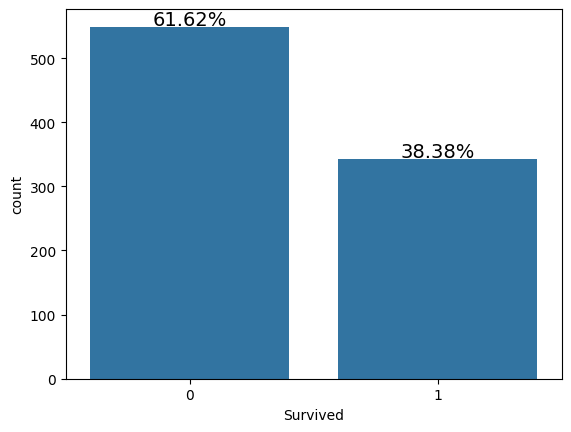

In [45]:
s = sns.countplot(x = 'Survived', data = train)
hung = []
for p in s.patches:
  height = p.get_height()
  hung.append(height)
  s.text(p.get_x()+p.get_width()/2,height + 3,'{:1.2f}%'.format(height/len(train)*100),ha = 'center',fontsize = 14)